# Installation

**CPU-only version**

$ pip install tensorflow 



**GPU version**

$ pip install tensorflow-gpu






# Modules and Libraries

In [1]:
import tensorflow as tf

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
tf.__version__

'1.7.0'

# InitializeTraining data

In [3]:
n_samples = 100

In [4]:
x_train = np.linspace(-1, 1,n_samples, np.float32)
y_train = np.array(2*x_train + np.random.randn(*x_train.shape)*0.8, np.float32)

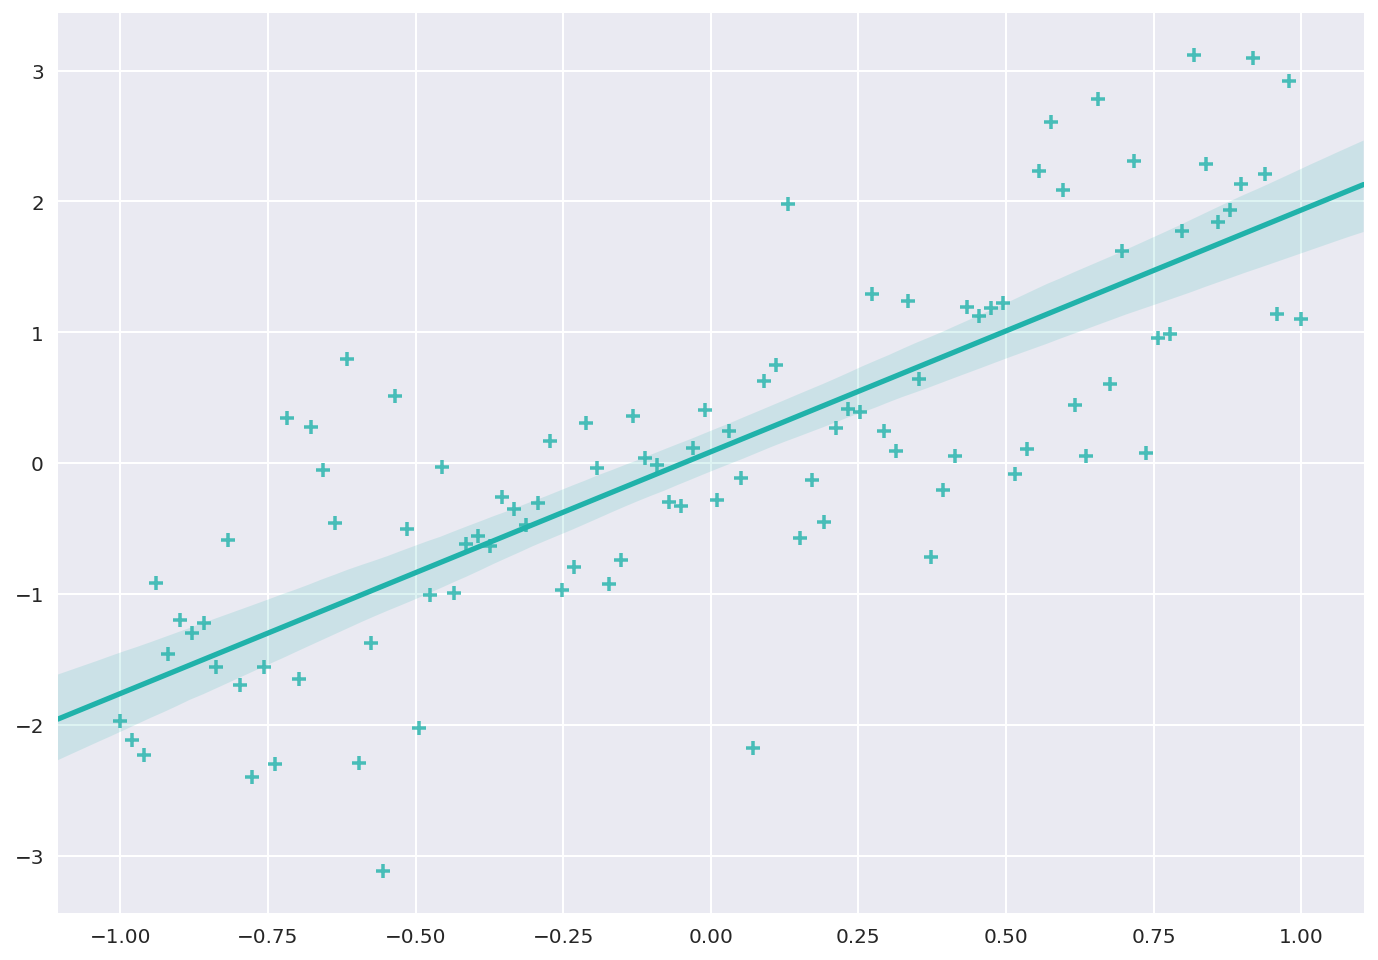

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax= sns.regplot(x=x_train,y=y_train, color = 'lightseagreen', marker = '+')

In [ ]:
X_train = np.reshape(x_train, (n_samples,1))
Y_train = np.reshape(y_train, (n_samples,1))

# Model Parameters

In [ ]:
learning_rate = 1e-2
training_epochs = 300
save_file = 'model/linear_regression.ckpt'

# Model Architecture

In [ ]:
with  tf.variable_scope('input'):
    x = tf.placeholder(tf.float32,(None, 1))
    y = tf.placeholder(tf.float32,(None, 1))

In [ ]:
with tf.variable_scope('linear_regression'):
    w = tf.get_variable('weights',(1,1), initializer=tf.random_normal_initializer())
    b = tf.Variable(tf.zeros((1)),tf.float32, name = 'bias')
    y_pred = tf.add(tf.matmul(x,w),b)

In [ ]:
with tf.name_scope('train'):
    loss = tf.reduce_mean(tf.square(y-y_pred))
    train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [ ]:
init = tf.global_variables_initializer()

In [ ]:
print(tf.get_default_graph().as_graph_def())

# Model Training 

In [ ]:
weights_hist = tf.summary.histogram('weights',w)
bias_hist = tf.summary.histogram('bias',b)
prediction_scalar = tf.summary.histogram('y_pred', y_pred)
loss_scalar = tf.summary.scalar('loss',loss)


merged = tf.summary.merge_all()
saver = tf.train.Saver()

In [ ]:
with tf.Session() as sess: 
    sess.run(init)
    writer = tf.summary.FileWriter('projector', sess.graph)
    
    for step in range(training_epochs):        
        summary, cost, _, pred= sess.run([merged,loss,train_op,y_pred], feed_dict ={x:X_train, y: Y_train })
        writer.add_summary(summary, step)
        saver.save(sess,save_file, global_step=step)       
        if step % 10 == 0: 
            print('Epoch {:<3} - Training Loss: {}'.format(step,cost))
    writer.close()    
    
    weights = sess.run(w)
    bias = sess.run(b)
    print('weights: ',weights)
    print('bias: ',bias)

# Regression Result

In [ ]:
pred_y = np.squeeze(pred)
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.regplot(x=x_train, y=y_train, color = 'lightseagreen', marker = 'o',label = 'Original')
sns.regplot(x=x_train, y=pred_y, color = 'salmon', marker = 'x', ci = 68,label ='Model-generated')
plt.legend()